In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [3]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)

In [4]:
default_hog = pickle.load(open("cmj_exp_results_1.pkl", "rb"))
default_honv = pickle.load(open("cmj_exp_results_2.pkl", "rb"))
scaled_hog = pickle.load(open("cmj_exp_results_3.pkl", "rb"))
scaled_honv = pickle.load(open("cmj_exp_results_4.pkl", "rb"))
padded_hog = pickle.load(open("cmj_exp_results_5.pkl", "rb"))
padded_honv = pickle.load(open("cmj_exp_results_6.pkl", "rb"))
small_hog = pickle.load(open("cmj_exp_results_7.pkl", "rb"))
small_honv = pickle.load(open("cmj_exp_results_8.pkl", "rb"))

In [9]:
results_hog = {"Default HOG": default_hog, "Scaled HOG": scaled_hog, "Padded HOG": padded_hog, "Small HOG": small_hog}
results_honv = {"Default HONV": default_honv, "Scaled HONV": scaled_honv, "Padded HONV": padded_honv, "Small HONV": small_honv}

participants = ["p1", "p3", "p4", "p6"]

In [10]:
def average_participant_results(results, k_folds=3):
    
    acc = 0
    f_score = 0
    conf_mat = np.zeros((3,3), dtype="int")
    
    for i in range(k_folds):
        acc += results["cv{}_accuracy".format(i)]
        f_score += results["cv{}_f_score".format(i)]
       
        # dealing with different size confusion matrices / shouldn't be larger than 3,3
        cm = np.array(results["cv{}_conf_mat".format(i)], dtype="int")
        idx_y = conf_mat.shape[0] - cm.shape[0]
        idx_x = conf_mat.shape[1] - cm.shape[1]
        conf_mat[:-idx_y or None, :-idx_x or None] += cm
        
    return acc / k_folds, f_score / k_folds, conf_mat


In [11]:
def average_experiment_results(results, participants, k_folds=3):
    
    exp_acc = 0
    exp_f = 0
    exp_cm = np.zeros((3,3), dtype="int")
    
    for p in participants:
        acc, f_score, cm = average_participant_results(results[p], k_folds)
        exp_acc += acc
        exp_f += f_score
        
        diff_x = (exp_cm.shape[1] - cm.shape[1]) * -1
        diff_y = (exp_cm.shape[0] - cm.shape[0]) * -1
        exp_cm[:diff_y or None,:diff_x or None] += cm
        
    return exp_acc / len(participants), exp_f / len(participants), exp_cm

In [8]:
acc, f_score, conf_mat = average_participant_results(default_hog["p4"])

In [9]:
print(acc)
print(f_score)
print(conf_mat)

0.867604447212
0.867388477777
[[1869  393    0]
 [ 353 3023    0]
 [   0    0    0]]


In [10]:
acc, f_score, conf_mat = average_participant_results(default_honv["p1"])

In [11]:
print(acc)
print(f_score)
print(conf_mat)

0.926052979671
0.923984232195
[[5811   12  188]
 [  67   90    5]
 [ 260    0  761]]


In [12]:

acc, f_score, conf_mat = average_experiment_results(default_hog, participants)

In [13]:
print(acc)
print(f_score)
print(conf_mat)

0.933265995752
0.930524465362
[[17624   448   229]
 [  612  4533    15]
 [  314    19   762]]


In [14]:
acc, f_score, conf_mat = average_experiment_results(scaled_hog, participants)

In [15]:
print(acc)
print(f_score)
print(conf_mat)

0.928905226533
0.92626098735
[[17590   452   259]
 [  662  4484    14]
 [  347    15   733]]


In [16]:
acc, f_score, conf_mat = average_experiment_results(padded_hog, participants)

In [19]:
print(acc)
print(f_score)
print(conf_mat)

0.947489182457
0.945159779681
[[17804   309   188]
 [  464  4691     5]
 [  318    15   762]]


In [20]:
acc, f_score, conf_mat = average_experiment_results(default_honv, participants)

In [21]:
print(acc)
print(f_score)
print(conf_mat)

0.947489182457
0.945159779681
[[17804   309   188]
 [  464  4691     5]
 [  318    15   762]]


In [22]:
acc, f_score, conf_mat = average_experiment_results(scaled_honv, participants)

In [23]:
print(acc)
print(f_score)
print(conf_mat)

0.947739695747
0.945238493371
[[17813   306   182]
 [  462  4690     8]
 [  320    16   759]]


In [25]:
accs, fs, cms = [], [], []

for r in results_honv.values():
    exp_accs, exp_fs, exp_cms = [], [], []
    
    for p in participants:
        acc, f_score, cm = average_participant_results(r[p])
        
        exp_accs.append(acc)
        exp_fs.append(f_score)
        exp_cms.append(cm)
        
    accs.append(exp_accs)
    fs.append(exp_fs)
    cms.append(exp_cms)
    
accs = np.array(accs)
fs = np.array(fs)
cms = np.array(cms)

l = len(accs)

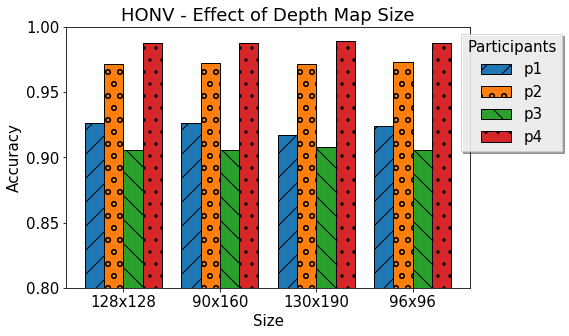

In [27]:
idx = np.arange(l) + 1
width = .2

plt.figure(figsize=(8,5))
plt.ylim([.85, 1.0])
plt.yticks(np.linspace(.8, 1.0, 5))
plt.ylabel("Accuracy")
plt.xticks(idx,["128x128", "90x160", "130x190", "96x96"])
plt.xlabel("Size")

ax = plt.gca()

ax.set_position([0.125,0.15,.7,.725])

plt.title("HONV - Effect of Depth Map Size")
plt.bar(idx-(width*1+width/2), accs[:,0], width, hatch="/", edgecolor='black')
plt.bar(idx-(width*0+width/2), accs[:,1], width, hatch="o", edgecolor='black')
plt.bar(idx+(width*1-width/2), accs[:,2], width, hatch="\\", edgecolor='black')
plt.bar(idx+(width*2-width/2), accs[:,3], width, hatch=".", edgecolor='black')
plt.legend(["p1", "p2", "p3", "p4"], loc='center left', bbox_to_anchor=(.96, 0.75), fancybox=False, shadow=True, title="Participants")
plt.savefig("/Users/fortjay81/OneDrive - University of Victoria/dissertation/2_publications/2_Submitted/CMJ_VPT_2017/figures/raw/cmj-honv-imagesize.pdf")

In [347]:
print(np.average(accs, axis=1))

[ 0.94748918  0.9477397   0.94632681  0.94758018]


<Container object of 3 artists>

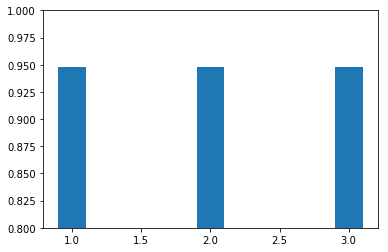

In [286]:
idx = np.arange(l) + 1
width = .2

plt.ylim([.8, 1.0])

plt.bar(idx, np.average(accs, axis=1), width)

[[17624   448   229]
 [  612  4533    15]
 [  314    19   762]]
[[17804   309   188]
 [  464  4691     5]
 [  318    15   762]]
[[17590   452   259]
 [  662  4484    14]
 [  347    15   733]]
[[17813   306   182]
 [  462  4690     8]
 [  320    16   759]]
[[17575   440   286]
 [  548  4595    17]
 [  358    24   713]]
[[17573   501   227]
 [  578  4561    21]
 [  334    18   743]]
[[17796   307   198]
 [  443  4709     8]
 [  329    16   750]]


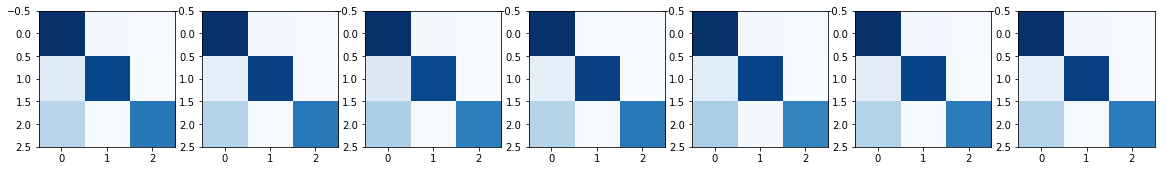

In [159]:
plt.figure(figsize=(20,4))
for i, (title, results) in enumerate(results_dict.items()):
    acc, f_score, conf_mat = average_experiment_results(results, participants)
    print(conf_mat)
    conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    plt.subplot(1, len(results_dict), i+1)
    plt.imshow(conf_mat, cmap="Blues")

In [124]:
acc, f_score, conf_mat = average_experiment_results(results_dict["Default HOG"], participants)
total_corr = np.sum(conf_mat[0])

In [125]:
total_corr / np.sum(conf_mat)

0.74527610359993479